# Phase-field modelling of vacancy diffusion in the anode-electrolyte interface #
---

## 1) Phase-field Modelling & the Cahn-Hilliard Equation ##

We can define a composition parameter, C, to distinguish the two regions, where

$ C = 0 $ in the bulk electrolyte

$ C = 1 $ in the bulk electrode

$ 0 < C < 1 $ across the interface

Phase evolution of the composition parameter can be described by the Cahn-Hilliard equation:

$$ \frac{\partial C}{\partial t} = M\nabla^2 \mu $$

- $\mu$ is the chemical potential 
- $M$ is the mobility

The chemical potential, $\mu$, can be found from the free energy functional, which is given as:

$$ \mathcal{F} = \int (f(C)+\frac{\kappa}{2}|\nabla C|^2) dV $$

The integrand is the free energy density, $F(C)$, i.e.

$$ F(C) = f(C) + \frac{\kappa}{2}|\nabla C|^2 $$

- The first term, f(C), is a double well potential which encourages phase separation, 
- The second term (the interfacial term) penalizes sharp gradients.
    - $\kappa$ is the interfacial gradient

In our case, the double well potential, $f(C)$, is given as:

$$ f(C) = 2C^2(1-C)^2 $$

- $f(C)$ has minima at both $C = 0$ and $C = 1$

Using the variational derivative, we can find the chemical potential:

$$ \mu = \frac{\delta F}{\delta C} = \frac{\partial F}{\partial C} - \vec \nabla \left(\frac{\partial F}{\partial \nabla C}\right)$$

This gives our chemical potential as:

$$ \mu = 4C(1-C)(1-2C)-\kappa\nabla^2 C $$

And thus, our Cahn-Hilliard equation can be written as:

$$ \frac{\partial C}{\partial t} = M \nabla^2 (4C(1-C)(1-2C)-\kappa\nabla^2C) $$

This represents the phase evolution within our system.

**How do we approximate this?**

At each time step, we want to update the composition. The composition, $C^{n+1}_i$, can be written, using the finite difference method, as

$$ C_i^{n+1}=C_i^n+\Delta t M \nabla^2 \mu^n_i$$

This is dependent on the Laplacian (second derivative) of the chemical potential at point $n$ ($\mu^n_i$), which is dependent on the chemical potentials at $n, n+1,$ and $ n-1$. The Laplacian of the chemical potential can be written as

$$ \nabla^2 \mu_i^n= \frac{\mu^n_{i+1}-2\mu^n_i+\mu^n_{i-1}}{\Delta x^2}$$

The chemical potential at point n, $\mu^n_i$
$$\mu^n_i=4C_i^n(1-C^n_i)(1-2C^n_i)-\kappa\nabla^2C^n_i$$

This is dependent on the Laplacian of the concentration at point n, which can be rewritten as
$$ \nabla^2 C_i^n= \frac{C^n_{i+1}-2C^n_i+C^n_{i-1}}{\Delta x^2}$$

In summary, we have:

$$\mu^n_i=4C_i^n(1-C^n_i)(1-2C^n_i)-\kappa\frac{C^n_{i+1}-2C^n_i+C^n_{i-1}}{\Delta x^2}$$

which is then used to find the updated concentration:

$$ C_i^{n+1}=C_i^n+\Delta t M \frac{\mu^n_{i+1}-2\mu^n_i+\mu^n_{i-1}}{\Delta x^2}$$

### Stability Analysis (?) ###

$$\Delta t \le \frac {(\Delta x)^4} {M-1}$$

---
## 2) Electrochemical Potential in the System ##

The **electro**chemical potential of each species $i$ can be defined as:

$$ \bar \mu_i = \mu_i^o + k_B T (\ln a_i) + z_i e \varphi, \ i\in \{V_O^{\cdot \cdot}, e', Y'_Zr\} $$

- $k_B$ is Boltzmann's constant
- $T$ is temperature
- $z_i$ is the species charge (per ion)
- $e$ is the elementary charge
- $\varphi$ is the electrostatic potential
- $a_i$ is the activity of species $i$, where $a_i = \gamma _i \Chi _i = \gamma _i c_i V_0$
    - $\Chi _i$ is the molar fraction
    - $\gamma _i$ is the activity coefficient
    - $c_i$ is the molar concentration
    - $V_0$ is the molar volume (we assume constant)
- **Note that both the electrode and electrolyte are considered ideal solutions, with $\gamma _i = 1$**

---
#### The gradient of the electrochemical potential can be split into chemical, concentration, and electrostatic gradient terms. ####
---

**(1)** The chemical potential of any species $i$ will vary depending on the phase which contains it. An interpolation is used to define the standard chemical potential across the interface:

$$ \mu_i^o = \mu_i^{o, YSZ} + \left(\mu_i^{o, anode}-\mu_i^{o, YSZ}\right) h (C) $$

With the interpolation function, h(C), given as:

$$ h(C) = C^3(6C^2-15C+10) $$

**(2)** The overall flux and mass transport of each species in the system is driven, in part, by the electrostatic potential. The electrostatic potential also contributes to the electrochemical potential, $\mu$

The gradient is found using **Poisson's Equation**:

$$\nabla \cdot (\varepsilon _0\varepsilon _r \nabla \varphi) = - \rho $$

- $\varphi$ is the electrostatic potential
- $ \varepsilon _0$ is the vacuum permittivity
- $ \varepsilon _r$ is the relative permittivity, assumed independent of C
- $\rho$ is the total charge density

The total charge density, $\rho$, is defined as the following:

$$ \rho = e N_A \sum_i z_i c_i(x)$$

- $e$ is the elementary charge
- $N_A$ is Avogadro's number
- $z_i$ is the charge of species $i$
- $c_i$ is the molar concentration of species $i$

## 3) Species Flux ##

An equation can now be written for the flux of each species $i$.

The general expression is given as:
$$\textbf{J}_i = -D_i c_i \nabla \left(\frac{\bar\mu_i}{k_B T}\right)

Breaking up the electrochemical potential gradient (as we showed earlier), can give the flux equation as:

$$\textbf{J}_i = - \frac{D_i c_i}{k_B T}\nabla\mu ^0_i - D_i\nabla c_i(x, t)-\frac{D_i z_i e c_i}{k_B T}\nabla \varphi $$

- $D_i$ is the self-diffusivity of species $i$

### Summary of flux expression terms ###
| Term                                      | Source |
|-------------------------------------------|---------------------------------|
|$\frac{D_i c_i}{k_B T}\nabla\mu ^0_i$      | chemical potential gradient     |
|$D_i\nabla c_i(x, t) $                     | concentration gradient          |
|$\frac{D_i z_i e c_i}{k_B T}\nabla \varphi$| electromigration against electrostatic potential gradient|

## 4) Diffusion Equation ##

The mass conservation equation is simply the negative divergence of the flux, with an adjustment for the interface reaction.

$$\frac{\partial c_i(x,t)}{\partial t} = - \nabla \cdot J_i - R_i^{3PB}K\Lambda _C$$

**The sink term:**

- This term is included to account for the oxygen oxidation reaction that occurs at the interface (i.e. $O^{\times}_{O, YSZ}\rightarrow \frac{1}{2}O_2 + 2e' + V_{O, YSZ}^{\cdot \cdot}$)

$$ R = R_i^{3PB}K\Lambda _C $$

- $R_i^{3PB}$ is the rate constant for the interface reaction
    - $R_i^{3PB} = |\frac{i_a}{N_A e z_i}|$ for $V_O^{\cdot \cdot}$, $e'$
        - $i_a = e N_A \sum_{i} z_i J_i$
    - $R_i^{3PB} = 0$ for $Y_{Zr}'$
- $K$ is the effective length scale over which the reaction occurs
- $\Lambda _C$ is the interface reaction locator function, $\Lambda_C = C^2(1-C)^2$

**Notes:** 
- The rate constant can be kept the same while integrating the sink term by defining $K = 1/{\int_{-\infty}^{+\infty}\Lambda _C dx}$
- The interface locator function keeps any occurence of nonzero values of the sink term at the interface (i.e. it will only have an effect if C $\neq$ 0 or 1)

We then get our final diffusion equation for any species $i$ as:
$$\frac{\partial c_i(x,t)}{\partial t} = \nabla \cdot \frac{D_i c_i}{k_B T}\nabla\mu ^0_i + \nabla \cdot D_i\nabla c_i(x, t) + \nabla \cdot\frac{D_i z_i e c_i}{k_B T}\nabla \varphi - R_i^{3PB}K\Lambda _C$$

## 5) Implementation - Phase Field ##

---
### The Laplacian operator (second order derivatives) ###
---

The same can be done for the Laplacian operator, where $\nabla^2$ is approximated as:
$$ \nabla^2 c_i^n= \frac{c^n_{i+1}-2c^n_i+c^n_{i-1}}{|\Delta x|^2}$$

For the bulk free energy term:
$$ \nabla^2 f'(c_i^n) = \frac{f'(c^n_{i+1})-2f'(c^n_i)+f'(c^n_{i-1})}{|\Delta x|^2}$$

---
### **Initialization** ###
---

We can initialize the array of the composition parameter, $C(x, t)$.

- The first half, minus half the allocated number of transition points, is set to 0.0

- The transition region is set to contain values between 0.0 and 1.0, evenly spaced by the number of desired transition points (-1)

- The second half, minus the other half of the allocated number of transition points, is set to 1.0

---
### **The For Loop -> Phase-Field** ###
---

__Implementing this in code:__

__1)__ Find the Laplacian of the concentration (for every point in the grid):
$$ \nabla^2 c_i^n= \frac{c^n_{i+1}-2c^n_i+c^n_{i-1}}{\Delta x^2}$$

__2)__ Compute the chemical potential at each point:
$$\mu^n_i=2Ac_i^n(1-c^n_i)(1-2c^n_i)-2\kappa\nabla^2c^n_i$$

__3)__ Find the Laplacian of the chemical potential (for every point in the grid):
$$ \nabla^2 \mu_i^n= \frac{\mu^n_{i+1}-2\mu^n_i+\mu^n_{i-1}}{\Delta x^2}$$

__4)__ Update the concentration at each point:
$$ c_i^{n+1}=c_i^n+\Delta t M \nabla^2 \mu^n_i$$

---

## 6) Implementation - Species Diffusion ##

---
### **Initialization** ###
---

**Concentrations:**

The concentration of each species (mol/m^3) are intialized as follows:

**In the electrolyte:** 

$c_{V_O^{\cdot \cdot}} = 830 $ 

$c_{e'} = 0$

$c_{Y'_Zr} = 1660$

**In the anode:** 

$c_{V_O^{\cdot \cdot}} = 83 $ 

$c_{e'} = 166$

$c_{Y'_Zr} = 0$

|   | Concentration | (mol/m^3) |
|---|---------------|---------|
|Species| Electrolyte | Cathode |
|${V_O^{\cdot \cdot}}$ | 830 | 83 |

**Electrostatic Potential:**

The electrostatic potential is initialized at zero across the domain, i.e. $\varphi = 0$ at every point $x$.


---
### **The For Loop -> Species Diffusion** ###
---

---
### a) Electrostatic Potential and Charge Density; $\varphi$ and $\rho$ ###
---

**Boundary Conditions:**

At the electrolyte boundary, $\varphi = 0$ - Dirichlet boundary condition

At the anode boundary, $\frac{\partial \varphi}{\partial x} = \frac{i_a}{\sigma}$, where $\sigma$ is the conductivity - Neumann boundary condition

At each time step,

**Step 1)** 

Find the value of $\rho$ at every point x:

$$ \rho(x) = e N_A \sum_i z_i c_i(x)$$

- This is done as an array operation

**Step 2)** 

Use the Gauss-Seidel method to find solve Poisson's equation for the updated electrostatic potential, $\varphi$

Poisson's equation:

$$\nabla \cdot (\varepsilon _0\varepsilon _r \nabla \varphi) = - \rho_j $$ 

$$ \nabla^2 \varphi = \frac{-\rho_j}{\varepsilon _0 \varepsilon _r} $$



Gauss-Seidel method:

$$ \frac{ \varphi_{j+1} - 2 \varphi_j + \varphi_{j-1}}{dx^2} = \frac{-\rho_j}{\varepsilon _0 \varepsilon _r} $$

$$ \varphi_j^{n+1} = \frac{1}{2} \left( \varphi^n_{j+1} + \varphi^{n+1}_{j-1}- \frac{\rho_j dx^2}{\varepsilon _0 \varepsilon _r} \right)$$

We find the difference of our new array of updated electrostatic potential values and the old values, iterating (updating) until that difference is less than our tolerance.


---
### b) Standard Chemical Potential, $\mu_i^o$ ###
---

At each time step,

**Step 1)**

Compute the interpolation function, $h(C)$, from the composition value $C$ at each point in the domain.

Recall:
$$ h(C) = C^3(6C^2-15C+10) $$

**Step 2)** 

Compute the standard chemical potential for each species at each point in the domain, based on the standard chemical potentials in the bulk phases and the interpolation function.

Recall:
$$ \mu_i^o = \mu_i^{o, YSZ} + \left(\mu_i^{o, anode}-\mu_i^{o, YSZ}\right) h (C) $$


---
### c) Diffusion, $\frac{\partial c}{\partial t}$ ###
---

**Boundary Conditions:**

For $c_i$, the boundary conditions are defined for each species for each side of the system - these are **Neumann** boundary conditions

At the electrolyte side:

- $J_{Y_{Zr}'} = J_{e'} = 0$
- $J_{V_O^{\cdot \cdot}} = - \frac{i_a}{z_i e N_A}$

At the anode side:

- $J_{Y_{Zr}'} = J_{V_O^{\cdot \cdot}} = 0$
- $J_{e'} = - \frac{i_a}{z_i e N_A}$

Flux is related to the change in concentration over time via:

$$\textbf{J} = - D \frac{\partial c}{\partial x}$$

So this gives us Neumann boundaries.

Recall:
$$\frac{\partial c_i(x,t)}{\partial t} = \nabla \cdot \frac{D_i c_i}{k_B T}\nabla\mu ^0_i + \nabla \cdot D_i\nabla c_i(x, t) + \nabla \cdot\frac{D_i z_i e c_i}{k_B T}\nabla \varphi - R_i^{3PB}K\Lambda _C$$

At each time step, for each species $i$,

**Step 1)**

Calculate the chemical potential gradient term, $\nabla \cdot \frac{D_i c_i}{k_B T}\nabla\mu ^0_i$.

- Take the Laplacian of $\mu ^0_i$
- Multiply by $\frac{D_i c_i}{k_B T}$


**Step 2)**

Calculate the concentration gradient term, $\nabla \cdot D_i\nabla c_i(x, t)$.

- Take the Laplacian of $c_i(x, t)$
- Multiply by $D_i$


**Step 3)**

Calculate the electrostatic gradient (the electric field) term, $\nabla \cdot\frac{D_i z_i e c_i}{k_B T}\nabla \varphi $.

- Take the Laplacian of $\varphi$
- Multiply by $\frac{D_i z_i e c_i}{k_B T}$


**Step 4)**

Calculate the sink term, $R_i^{3PB}K\Lambda _C$.

- Compute the interface locator function, $\Lambda_C$, for every point on the domain
$$ \Lambda_C = C^2(1-C)^2 $$

- K, the normalizing constant, must be integrated for, where the integral is given as:
$$ K = 1 / \int_{-\infty}^{+\infty}\Lambda_C dx$$

- Compute $R_i^{3PB}$. Note, this is dependent on the species:
    - $R_i^{3PB} = |\frac{i_a}{N_A e z_i}|$ for $V_O^{\cdot \cdot}$, $e'$
    - $R_i^{3PB} = 0$ for $Y_{Zr}'$

- Compute the sink term

**Step 5)** 

Sum all terms together to update the concentrations.


---
## Summary of Diffusion Loop Steps ##

**At each time step:**

1) Solve Cahn-Hilliard for the updated composition parameter, $C$, at every point on the domain

2) Compute $\rho$ and solve Poisson's equation for the updated electrostatic potential, $\varphi$, at every point on the domain

3) Use the interpolation function to compute the $\mu^o_i$ for every species $i$ at every point on the domain

4) Use the diffusion equation to update the concentrations of every species $i$ at every point on the domain

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# Parameters & Constants for Phase-Field Model
# ------------------------------------------------------------------------------

M = 1.0 #mobility constant, m^5/(J*s)
kappa = 4.0 #gradient energy constant, J/m
xmax = 50.0 #physical domain size, m
nx = 50 #number of spatial discretization points
dx = xmax/(nx-1) #spatial discretization step, m
x = np.linspace(-xmax/2, xmax/2, nx) #spatial grid
dt = 1e-2 #time step, s
nsteps = 1000000 #number of time steps
trans = 4 #number of transition steps between two phases

# ------------------------------------------------------------------------------
# Parameters & Constants for Diffusion 
# ------------------------------------------------------------------------------

from scipy.constants import epsilon_0, elementary_charge as e, Avogadro as NA, k as kB

epsilon_r = 40.0 #relative permittivity
epsilon = epsilon_0 * epsilon_r #absolute permittivity, F/m
i_a = 0 #-8e6           # Applied current density [A/m²]
sigma = 1.0          #conductivity (for the current density to electric field proportionality)

# ------------------------------------------------------------------------------
# Reference values from literature
# ------------------------------------------------------------------------------
c_ref = 1660               # mol/m^3, reference concentration
rho_ref = 1.6e6            # C/m^3, reference charge density
interface_width = 4.0      # nm, width of the phase-field interface (0 < C < 1)
lambda_D = 1.0             # nm, Debye length
T = 1273.0               # K, temperature

In [118]:
# make a dictionary with the dict () constructor for all species

charges = {
    "vac" : 2.0,
    "elec" : -1.0,
    "yzr" : -1.0,
}

# concentrations -> [mol/m³]

vac = {
    "mu_YSZ" : 0.12,
    "mu_anode" : 0.2,
    "diffusivity" : 1.0e-8,
    "bulk_anode_conc" : 83.0,
    "bulk_YSZ_conc" : 830.0,
    "rate_constant" : abs(i_a / e * NA * charges["vac"]),
}

elec = {
    "mu_YSZ" : 0.0,
    "mu_anode" : 0.0,
    "diffusivity" : 2.0e-4,
    "bulk_YSZ_conc" : 0.0,
    "bulk_anode_conc" : charges["vac"] * vac["bulk_anode_conc"],
    "rate_constant" : abs(i_a / e * NA * charges["elec"]),
}

yzr = {
    "mu_YSZ" : 0.0,
    "mu_anode" : 0.0,
    "diffusivity" : 1.0e-8,
    "bulk_YSZ_conc" : 1660.0,
    "bulk_anode_conc" : 0.0,
    "rate_constant" : 0.0,
}

conc_boundaries = {
    "vac" : dict(YSZ = - ( i_a / e * NA * charges["vac"] ) / vac["diffusivity"], anode = 0.0),
    "elec" : dict(YSZ = 0.0, anode = - (i_a / e * NA * charges["elec"]) / vac["diffusivity"]),
    "yzr" : dict(YSZ = 0.0, anode = 0.0),
}

print(conc_boundaries["elec"]["YSZ"])

0.0


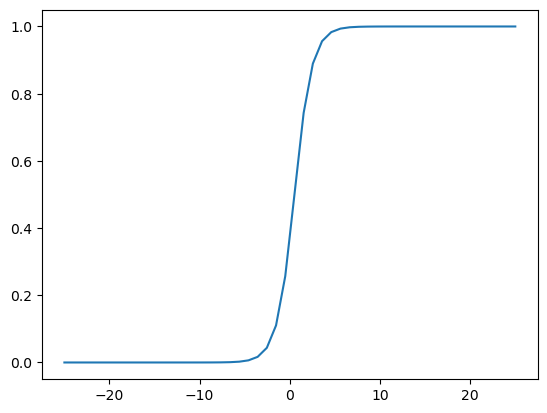

In [120]:
#intialize the composition field

comp = np.zeros(nx) #composition field

comp[0:int(nx/2 - trans/2)] = 0.0 #left phase

comp[int(nx/2 + trans/2):nx] = 1.0 #right phase

for i in range (trans):
    comp[int(nx/2 - trans/2 + i)] = 1.0/trans * i #linear transition

def laplacian(f, deltax): # for the cahn-hilliard equation
    lap = np.zeros_like(f, dtype=float) #initialize the laplacian array
    for i in range(1, len(f)-1):
        lap[i] = (f[i-1] - 2*f[i] + f[i+1]) / (deltax ** 2)
    return lap
# neumann

for time in range(nsteps):
    #for the Cahn-Hilliard equation (not species-specific)
    #step 1: calculate the laplacian of the concentration field
    lapc = laplacian(comp, dx)
    #step 2: compute the chemical potential (composition) at each point
    mu_comp = 4.0 * comp * (1.0 - comp) * (1.0 - 2.0 * comp) - kappa * lapc
    #step 3: find the laplacian of the chemical potential
    lap_mu = laplacian(mu_comp, dx)
    #step 4: update  the concentration field 1: calculate the laplacian of the concentration field
    comp += dt * M * lap_mu

plt.plot(x, comp)
plt.show()

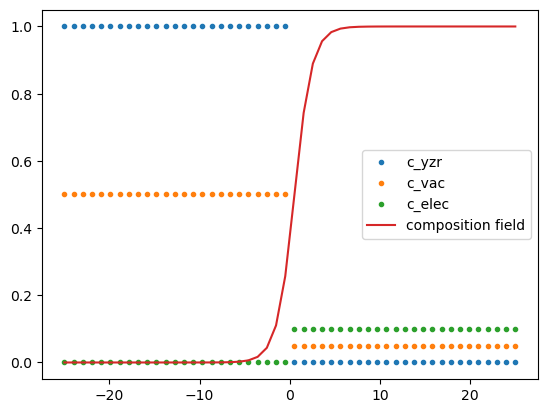

In [121]:
#initialize the concentrations of each species and electrostatic potential of the system

# ------------------------------------------------------------------------------
# Vacancy concentrations [mol/m³]
# ------------------------------------------------------------------------------

c_vac = np.zeros(nx)

c_vac[0:int(nx/2)] = vac["bulk_YSZ_conc"]
c_vac[int(nx/2):nx] = vac["bulk_anode_conc"]

c_vac = c_vac / c_ref  # normalize by reference concentration

# ------------------------------------------------------------------------------
# Yttrium-stabilized Zirconium concentrations [mol/m³]
# ------------------------------------------------------------------------------

c_yzr = np.zeros(nx)

c_yzr[0:int(nx/2)] = yzr["bulk_YSZ_conc"]
c_yzr[int(nx/2):nx] = yzr["bulk_anode_conc"]

c_yzr = c_yzr / c_ref  # normalize by reference concentration

# ------------------------------------------------------------------------------
# Electron concentrations [mol/m³]
# ------------------------------------------------------------------------------

c_elec = np.zeros(nx)

c_elec[0:int(nx/2)] = elec["bulk_YSZ_conc"]
c_elec[int(nx/2):nx] = elec["bulk_anode_conc"]

c_elec = c_elec / c_ref  # normalize by reference concentration

# ------------------------------------------------------------------------------
# Initialize the electrostatic potential field
# ------------------------------------------------------------------------------

varphi = np.zeros(nx) #potential field

# ------------------------------------------------------------------------------
# plot to see what these look like

plt.plot(x, c_yzr, ".", label='c_yzr')
plt.plot(x, c_vac, ".", label='c_vac')
plt.plot(x, c_elec, ".", label='c_elec')
plt.plot(x, comp, label='composition field')
plt.legend()
plt.show()


In [105]:
def laplacian(f, deltax): # for the cahn-hilliard equation
    lap = np.zeros_like(f)
    for i in range(1, len(f)-1):
        lap[i] = (f[i-1] - 2*f[i] + f[i+1]) / (deltax ** 2)
    return lap
# neumann

def laplacian_chem(f, deltax, mu_YSZ, mu_anode):
    f[0] = mu_YSZ
    f[-1] = mu_anode
    lap = np.zeros_like(f)
    for i in range(1, len(f)-1):
        lap[i] = (f[i-1] - 2*f[i] + f[i+1]) / (deltax ** 2)
    return lap

def laplacian_conc(f, deltax, left, right):
    lap = np.zeros_like(f)

    for i in range(1, len(f)-1):

        lap[i] = (f[i-1] - 2*f[i] + f[i+1]) / (deltax ** 2)
    
    # use ghost point to enforce boundary conditions on the left and right sides (again, neumann)
    lap[0] = (f[1] - 2*f[0] + (f[1] - 2 * deltax * left)) / (deltax ** 2)
    lap[-1] = (f[-2] - 2*f[-1] + (f[-2] + 2 * deltax * right)) / (deltax ** 2)
    return lap

def laplacian_elec(f, deltax):
    # Dirichlet boundary condition for the electric potential for electrolyte
    lap = np.zeros_like(f)
    f[0] = 0.0
    for i in range(1, len(f)-1):
        lap[i] = (f[i-1] - 2*f[i] + f[i+1]) / (deltax ** 2)
    lap[-1] = (f[-2] - 2*f[-1] + (f[-2] + 2 * deltax * i_a / sigma)) / (deltax ** 2)

    return lap

In [106]:
# let's solve poisson's equation

# ------------------------------------------------------------------------------
# function to calculate the charge density, rho

# function to calculate the potential, varphi 
def gauss_seidel_1D(varphi, rho, maxiter = 10000, tol = 1e-4):
    
    # Get the length of potential array (1-D)
    nx = len(varphi)
    
    # Iterate until convergence or maximum iterations reached
    for it in range(maxiter):
        varphi_old = varphi.copy()

        varphi[0] = 0.0
        
        varphi[-1] = varphi[-2] + dx * i_a/sigma

        # Update the potential using the Gauss-Seidel formula
        for j in range(1, nx-1):
                varphi[j] = 0.5 * (varphi[j+1] + varphi[j-1] - rho[j] * dx**2 / epsilon)
        
        # Check for convergence
        if np.max(np.abs(varphi - varphi_old)) < tol:
            print(f"Converged after {it} iterations.")
            return varphi
    
    print("Maximum iterations reached without convergence.")
    return varphi

In [107]:
# Okay now for the chemical potential

def interpolator(C):
    # Interpolation function for the chemical potential, polynomial
    h = C**3 * ( 6 * C**2 - 15 * C + 10)
    return h
    
# function to calculate the chemical potential, mu
def chemical_potential(C, mu_YSZ, mu_anode):
    mu = mu_YSZ + (mu_anode - mu_YSZ) * interpolator(C)
    return mu

In [124]:
# diffusion equation time! 
# function to calculate the diffusion equation (i.e. update the concentration!)

def interface_locator(C):
    # ensures interface reaction only occurs at interface
    lambda_C = C ** 2 * (1 - C) ** 2
    return lambda_C

# maybe becuase its in reduced units, we need to scale the diffusivity by the reference concentration

def diffusion (varphi, C, c, mu, D, z, R, left, right, mu_YSZ, mu_anode):
    # first term = chemical potential term
    chem_term = ( D * c / ( kB * T )) * laplacian_chem(mu, dx, mu_YSZ, mu_anode)
    constants = D * c / ( kB * T )
    print("constants", constants)

    print("laplacian_chem", laplacian_chem(mu, dx, mu_YSZ, mu_anode))

    print("chem_term", chem_term)

    # second term = concentration gradient term
    conc_term = D * laplacian_conc(c, dx, left, right)

    print("conc_term", conc_term)

    # third term = electrostatic potential term
    elec_term = ( D * z * e / ( kB * T )) * laplacian_elec(varphi, dx)

    print("elec_term", elec_term)

    # fourth term = sink term
    # need to first define K (normalization constant)
    integral = np.trapz(interface_locator(C), dx = dx) 
    K  = 1.0 / integral
    sink_term = R * K * interface_locator(C)

    print("sink_term", sink_term)

    c += (chem_term + conc_term + elec_term + sink_term) * dt

    return c

test = diffusion(varphi, comp, c_vac, chemical_potential(comp, vac["mu_YSZ"], vac["mu_anode"]), vac["diffusivity"], charges["vac"], vac["rate_constant"], conc_boundaries["vac"]["YSZ"], conc_boundaries["vac"]["anode"], vac["mu_YSZ"], vac["mu_anode"])
print("test", test)

# something may be iffy with the K term

constants [2.84484309e+11 2.84484309e+11 2.84484309e+11 2.84484309e+11
 2.84484309e+11 2.84484309e+11 2.84484309e+11 2.84484309e+11
 2.84484309e+11 2.84484309e+11 2.84484309e+11 2.84484352e+11
 2.84484957e+11 2.84496822e+11 2.84719292e+11 2.88943486e+11
 3.74726152e+11 4.09060418e+12 8.17096275e+14 2.74362985e+17
 9.04183333e+19 2.59931474e+22 5.21845525e+24 4.29073410e+26
 4.55145954e+27 2.52889550e+21 4.55878240e+26 4.32813022e+25
 5.28062814e+23 2.63366695e+21 9.16375070e+18 2.77025291e+16
 7.67791861e+13 9.32207171e+10 2.06238480e+10 2.80041530e+10
 2.84249553e+10 2.84471883e+10 2.84483446e+10 2.84484827e+10
 2.84484568e+10 2.84483446e+10 2.84484913e+10 2.84483964e+10
 2.84484309e+10 2.84484827e+10 2.84483705e+10 2.84484827e+10
 2.84484050e+10 2.84484309e+10]
laplacian_chem [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.33282274e-17
  1.99923411e-16

Converged after 0 iterations.
Maximum iterations reached without convergence.
Maximum iterations reached without convergence.
Maximum iterations reached without convergence.
Maximum iterations reached without convergence.
Maximum iterations reached without convergence.
Maximum iterations reached without convergence.
Maximum iterations reached without convergence.
Maximum iterations reached without convergence.
Maximum iterations reached without convergence.


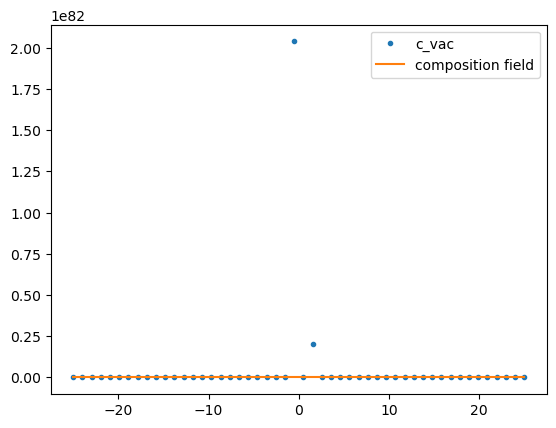

In [109]:
# i think i can just do the for loop now!

varphi = np.zeros_like(comp)
nsteps = 10

for time in range(nsteps):
    #for the Cahn-Hilliard equation (not species-specific)
    #step 1: calculate the laplacian of the concentration field
    lapc = laplacian(comp, dx)
    #step 2: compute the chemical potential (composition) at each point
    mu_comp = 4.0 * comp * (1.0 - comp) * (1.0 - 2.0 * comp) - 2.0 * kappa * lapc
    #step 3: find the laplacian of the chemical potential
    lap_mu = laplacian(mu_comp, dx)
    #step 4: update  the concentration field 1: calculate the laplacian of the concentration field
    comp += dt * M * lap_mu

    #for Poisson's equation (not species-specific)
    rho = e * NA * ( charges["vac"] * c_vac + charges["elec"] * c_elec + charges["yzr"] * c_yzr )
    rho /= rho_ref  # normalize by reference charge density
    varphi = gauss_seidel_1D(varphi, rho)

    #find the chemical potential for every species:
    mu_vac = chemical_potential(comp, vac["mu_YSZ"], vac["mu_anode"])
    mu_elec = chemical_potential(comp, elec["mu_YSZ"], elec["mu_anode"])
    mu_yzr = chemical_potential(comp, yzr["mu_YSZ"], yzr["mu_anode"])

    #update the concentration for every species: 
    c_vac = diffusion(varphi, comp, c_vac, mu_vac, vac["diffusivity"], charges["vac"], vac["rate_constant"], conc_boundaries["vac"]["YSZ"], conc_boundaries["vac"]["anode"], vac["mu_YSZ"], vac["mu_anode"])
    c_elec = diffusion(varphi, comp, c_elec, mu_elec, elec["diffusivity"], charges["elec"], elec["rate_constant"], conc_boundaries["elec"]["YSZ"], conc_boundaries["elec"]["anode"], elec["mu_YSZ"], elec["mu_anode"])
    c_yzr = diffusion(varphi, comp, c_yzr, mu_yzr, yzr["diffusivity"], charges["yzr"], yzr["rate_constant"], conc_boundaries["yzr"]["YSZ"], conc_boundaries["yzr"]["anode"], yzr["mu_YSZ"], yzr["mu_anode"])

#plt.plot(x, c_yzr, ".", label='c_yzr')
plt.plot(x, c_vac, ".", label='c_vac')
#plt.plot(x, c_elec, ".", label='c_elec')
plt.plot(x, comp, label='composition field')
plt.legend()
plt.show()
